<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**

>Neurons or "nodes" recieve input and pass a signal on if a certain condition or threshold is met. 

- **Input Layer:**

>The input layer is the input to the neural network. It is the data being fed in. Sometimes the input layer is backfed. 

- **Hidden Layer:**

>The hidden layer is the "black box" of Neural Networks. This is where the weights and responses for data are established. This is generally out of sight of the user hence the term (hidden).

- **Output Layer:**

>This layer returns a prediction of some sort based on whichever node's activation function, well, activates. 


- **Activation:**

>The threshold for which a neuron is activated. Usually a function of some sort such as a Sigmoid function or Relu. 

- **Backpropagation:**

>The process in which the neural network corrects itself. It takes the difference between the predicted and desired result and 
used the scaled difference to modify the weights that produce the prediction. It does this over an over until it detects it has reached the minimum of the cost function via gradient descent. 

## 2. Perceptron on XOR Gates <a id="Q3=2"></a>

Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2|x3|	y|
|---|---|---|---|
1|	1|	1|	1|
1|	0|	1|	0|
0|	1|	1|	0|
0|	0|	1|	0|

In [29]:
import numpy as np

# Establish inputs
inputs = np.array([
    [1,1,1],
    [1,0,1],
    [0,1,1],
    [0,0,1]
])

# Establish Target
target = [[1],
          [0],
          [0],
          [0]]
    
class Perceptron:
    def __init__(self,
                inputLayerSize=4,
                outputLayerSize=1,
                hiddenLayerSize=4):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        
        #Input Node
        self.weights1 = np.random.randn(self.inputLayerSize,
                                        self.hiddenLayerSize)
        #Output Node
        self.weights2 = np.random.randn(self.hiddenLayerSize, 
                                        self.outputLayerSize)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
    
    def train(self, X, y):
        """
        I threw in backprop. Sue me. 
        """
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [28]:
p1 = Perceptron(inputLayerSize=3)

for i in range(300):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', inputs)
        print('Actual Output: \n', target)
        print('Predicted Output: \n', str(np.around(p1.feed_forward(inputs))))
        print("Loss: \n", str(np.mean(np.square(target - p1.feed_forward(inputs)))))
    p1.train(inputs,target)

+---------EPOCH 1---------+
Input: 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Actual Output: 
 [[1], [0], [0], [0]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 [1.]]
Loss: 
 0.4760779625873319
+---------EPOCH 2---------+
Input: 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Actual Output: 
 [[1], [0], [0], [0]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 [1.]]
Loss: 
 0.3425440109131999
+---------EPOCH 3---------+
Input: 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Actual Output: 
 [[1], [0], [0], [0]]
Predicted Output: 
 [[1.]
 [0.]
 [1.]
 [0.]]
Loss: 
 0.2361703017916759
+---------EPOCH 4---------+
Input: 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Actual Output: 
 [[1], [0], [0], [0]]
Predicted Output: 
 [[0.]
 [0.]
 [0.]
 [0.]]
Loss: 
 0.199572474013656
+---------EPOCH 5---------+
Input: 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Actual Output: 
 [[1], [0], [0], [0]]
Predicted Output: 
 [[0.]
 [0.]
 [0.]
 [0.]]
Loss: 
 0.18953331629543846
+---------EPOCH 50---------+
Input: 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Actua

## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [71]:
# Import data
import pandas as pd
from scipy import optimize

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')

X = df.drop(columns='target').values
y = df[['target']].values
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
class MLP(object):
    def __init__(self,
                inputLayerSize=4,
                outputLayerSize=1,
                hiddenLayerSize=4):
        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        
        #Weights (parameters)
        #Input Layer
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        # Hidden Layers
        self.Wh = np.random.randn(self.hiddenLayerSize,self.hiddenLayerSize)
        # Output Layer
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        """
        Propagate inputs though network
        """
        # Input/1st Hidden Layer
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        # 2nd Hidden Layer
        self.zh = np.dot(self.a2, self.Wh)
        self.a3 = self.sigmoid(self.zh)
        # Output Layer
        self.z3 = np.dot(self.a3, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [90]:
p2 = MLP(inputLayerSize=X.shape[1])
tp = trainer(p2)
tp.train(X,y)

y_pred = np.around(MLP.forward(p2 , X))

Optimization terminated successfully.
         Current function value: 43.877625
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/anaconda3/envs/U4-S2-NNF/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/anaconda3/envs/U4-S2-NNF/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


In [94]:
# I have lots of room for improvement!

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

0.45544554455445546

## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [220]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [269]:
# create model
model = Sequential()
# Input and First Hidden Layer
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
# Second Hidden Layer
model.add(Dense(16, activation='relu'))
# Output Layer
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [270]:
model_history = model.fit(X_train, y_train,
                          epochs=100,
                          batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)
scores = model.evaluate(X_test, y_test)
print('Neural Network ACC: ', scores[1])

61/61 [==============================] - 0s 41us/step
Neural Network ACC:  0.4754098316685098


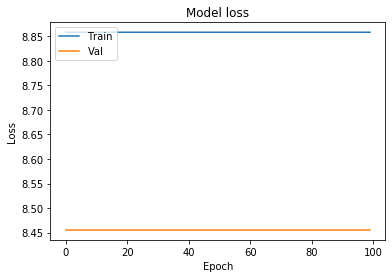

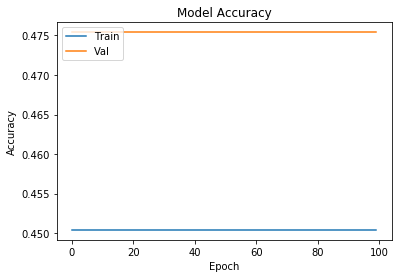

In [271]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Looks like I have some tuning to do!

There are a number of instances (like above) where the model is a flat line (single prediction). This also occured with the hard coded perceptron. I think this is case of extreme underfitting. 

There are a few things I can do to improve the rate of successful model. First, I want to make the relu start function more flexible. Instead of a sigmoid, I am going with LeakyReLU. 

Secondly, I want to switch to a sigmoid activation function for my hidden layers. 

Thirdly, I want to increase the number of nodes and layers to increase the odds of convergence (at the risk of overfitting). 

Next Steps:

- Optimizer change to Adam
- Leaky ReLU activation layer added
- Switch to sigmoid for hidden layers
- Decrease number of nodes in each layer

In [280]:
LeakyReLU = keras.layers.LeakyReLU(alpha=0.3)

# create model
model = Sequential()
# Input and First Hidden Layer
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
# LeakyReLU Advanced function layer. 
# See https://github.com/keras-team/keras/issues/2272#issuecomment-209001884
model.add(LeakyReLU)
# Second Hidden Layer
model.add(Dense(64, activation='sigmoid'))
# Third Hidden Layer
model.add(Dense(32, activation='sigmoid'))
# Output Layer
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [281]:
model_history = model.fit(X_train, y_train,
                          epochs=100,
                          batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

scores = model.evaluate(X_test, y_test)
print('Neural Network ACC: ', scores[1])

61/61 [==============================] - 0s 52us/step
Neural Network ACC:  0.8524590183476932


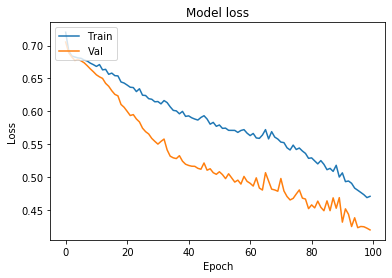

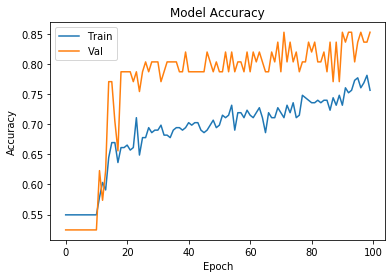

In [282]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validaiton accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Great!

Now let's find the optimal epoch and batch count with a grid search

In [284]:
# Define model function for Keras Classifier Object
def create_model():
    
    LeakyReLU = keras.layers.LeakyReLU(alpha=0.3)

    # create model
    model = Sequential()
    # Input and First Hidden Layer
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    # LeakyReLU Advanced function layer. 
    # See https://github.com/keras-team/keras/issues/2272#issuecomment-209001884
    model.add(LeakyReLU)
    # Second Hidden Layer
    model.add(Dense(64, activation='sigmoid'))
    # Third Hidden Layer
    model.add(Dense(32, activation='sigmoid'))
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    return model

model = KerasClassifier(build_fn=create_model, verbose=1)

In [286]:
%%time

# Define the grid search parameters
param_grid = {'batch_size': [10, 40, 80, 120],
              'epochs': [20, 50, 100 , 200, 400, 600]}

# Create Grid Search
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1)

grid_result = grid.fit(X, y, verbose=0)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

/anaconda3/envs/U4-S2-NNF/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.7623762429350673 using {'batch_size': 40, 'epochs': 400}
Means: 0.4950495076061475, Stdev: 0.1920314184620154 with: {'batch_size': 10, 'epochs': 20}
Means: 0.6567656789282368, Stdev: 0.18312967805085814 with: {'batch_size': 10, 'epochs': 50}
Means: 0.7590759040498891, Stdev: 0.09707669620258377 with: {'batch_size': 10, 'epochs': 100}
Means: 0.6270627106475358, Stdev: 0.0716273354256517 with: {'batch_size': 10, 'epochs': 200}
Means: 0.7161716210960162, Stdev: 0.06689202040707684 with: {'batch_size': 10, 'epochs': 400}
Means: 0.6633663456825534, Stdev: 0.050363611852460057 with: {'batch_size': 10, 'epochs': 600}
Means: 0.3993399411734968, Stdev: 0.2695013783503304 with: {'batch_size': 40, 'epochs': 20}
Means: 0.41584159045329583, Stdev: 0.26434821240729894 with: {'batch_size': 40, 'epochs': 50}
Means: 0.570957098660296, Stdev: 0.1548112259591325 with: {'batch_size': 40, 'epochs': 100}
Means: 0.6666666657814492, Stdev: 0.1756210569316004 with: {'batch_size': 40, 'epochs': 200}
Mea

### That looks delightfully random!

In [287]:
# I want to look at the loss functions

best_batch = grid_result.best_params_['batch_size']
best_epoch = grid_result.best_params_['epochs']

optimal_model = create_model()

opt = optimal_model.fit(X_train, y_train,
                        epochs=best_epoch,
                        batch_size=best_batch,
                        validation_data=(X_test, y_test),
                        verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/400
242/242 [==============================] - 2s 10ms/step - loss: 0.7892 - acc: 0.4504 - val_loss: 0.7081 - val_acc: 0.4754
Epoch 2/400
242/242 [==============================] - 0s 90us/step - loss: 0.6934 - acc: 0.5083 - val_loss: 0.6609 - val_acc: 0.6721
Epoch 3/400
242/242 [==============================] - 0s 91us/step - loss: 0.6676 - acc: 0.6405 - val_loss: 0.6513 - val_acc: 0.6393
Epoch 4/400
242/242 [==============================] - 0s 95us/step - loss: 0.6627 - acc: 0.6281 - val_loss: 0.6373 - val_acc: 0.7049
Epoch 5/400
242/242 [==============================] - 0s 94us/step - loss: 0.6571 - acc: 0.6240 - val_loss: 0.6303 - val_acc: 0.7049
Epoch 6/400
242/242 [==============================] - 0s 98us/step - loss: 0.6565 - acc: 0.6364 - val_loss: 0.6301 - val_acc: 0.7213
Epoch 7/400
242/242 [==============================] - 0s 104us/step - loss: 0.6530 - acc: 0.6281 - val_loss: 0.6244 - val_acc: 0.7377
Epoch 8/400
242/

In [289]:
scores = optimal_model.evaluate(X_test, y_test)
print('Neural Network ACC: ', scores[1])

61/61 [==============================] - 0s 115us/step
Neural Network ACC:  0.8688524609706441


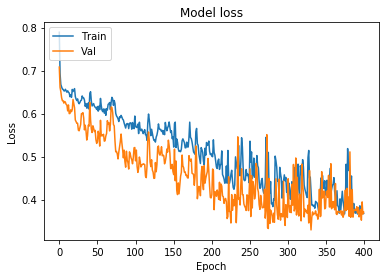

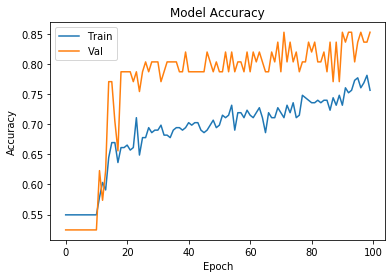

In [288]:
# Plot training & validation loss values
plt.plot(opt.history['loss'])
plt.plot(opt.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validaiton accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()